In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('vacinacao.csv')

In [3]:
df

,Ano,Ibge,Mes,Municipio,Não,Sim,Uf,latitude,longitude,region,region_name
0,2018,421915,JAN,VARGEM,NaN,1.0,SC,-27.48,-50.97,42008.0,Meio Oeste
1,2018,316560,JAN,SENADOR CORTES,NaN,1.0,MG,-21.80,-42.94,31047.0,São João Nepomuceno / bicas
2,2018,292370,JAN,PARATINGA,4.0,49.0,BA,-12.69,-43.18,29008.0,Ibotirama
3,2018,210070,JAN,ANAJATUBA,3.0,98.0,MA,-3.26,-44.62,21009.0,Itapecuru Mirim
4,2018,314650,JAN,PAINS,1.0,1.0,MG,-20.37,-45.66,31030.0,Formiga
...,...,...,...,...,...,...,...,...,...,...,...
546977,2014,310630,ABR,BELO ORIENTE,NaN,17.0,MG,-19.22,-42.48,31037.0,Ipatinga
546978,2014,410380,ABR,CAMBIRA,2.0,23.0,PR,-23.58,-51.57,41016.0,16ª RS Apucarana
546979,2014,211060,ABR,SÃO BERNARDO,14.0,68.0,MA,-3.36,-42.41,21006.0,Chapadinha
546980,2014,241220,ABR,SÃO JOSÉ DE MIPIBU,5.0,337.0,RN,-6.07,-35.23,24001.0,1ª Região de Saúde - São José de Mipibu


In [15]:
# Criando a coluna 'ano_mes' para facilitar o agrupamento
df['ano_mes'] = df['Ano'].astype(str) + "_" + df['Mes']

# Agrupando por 'ano_mes' e 'Ibge' e somando as colunas 'Sim' e 'Não'
result = df.groupby(['ano_mes']).agg({'Sim': 'sum', 'Não': 'sum'}).reset_index()
# Agrupando por 'ano_mes' e 'Ibge' e somando as colunas 'Sim' e 'Não'
result_ano = df.groupby(['Ano']).agg({'Sim': 'sum', 'Não': 'sum'}).reset_index()


In [7]:
result

,ano_mes,Sim,Não
0,2013_ABR,370.0,0.0
1,2013_AGO,2822.0,227.0
2,2013_DEZ,4619.0,273.0
3,2013_JUL,1777.0,268.0
4,2013_JUN,501.0,123.0
...,...,...,...
130,2024_FEV,3978962.0,3195811.0
131,2024_JAN,3826612.0,3290210.0
132,2024_JUN,4517593.0,3614387.0
133,2024_MAI,4495605.0,4400807.0


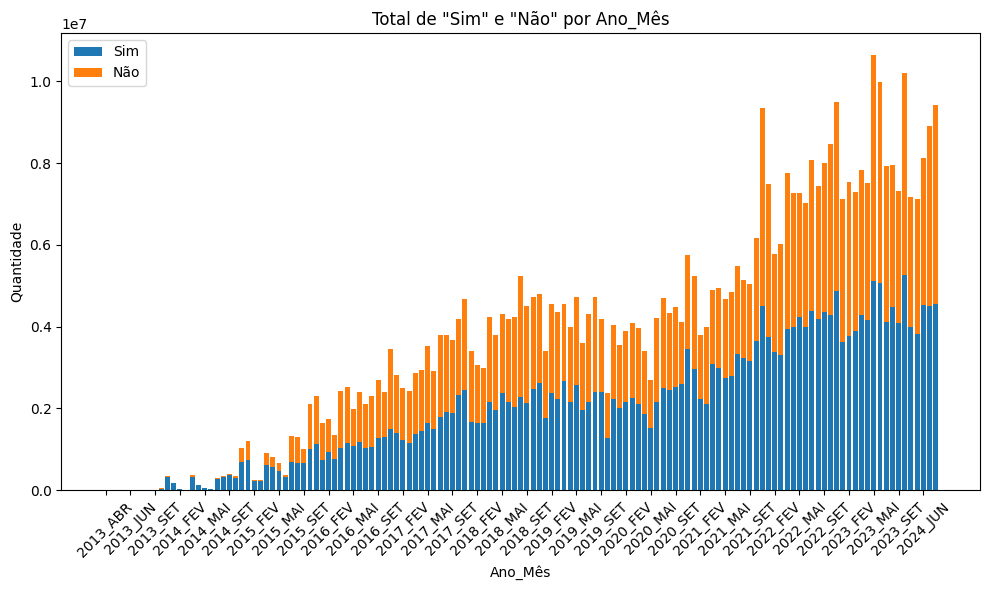

In [10]:
# Configurando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores de 'Sim' e 'Não' empilhados
ax.bar(result['ano_mes'], result['Sim'], label='Sim')
ax.bar(result['ano_mes'], result['Não'], bottom=result['Sim'], label='Não')

# Customizações do gráfico
ax.set_xlabel('Ano_Mês')
ax.set_ylabel('Quantidade')
ax.set_title('Total de "Sim" e "Não" por Ano_Mês')
ax.set_xticks(result['ano_mes'][::4])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

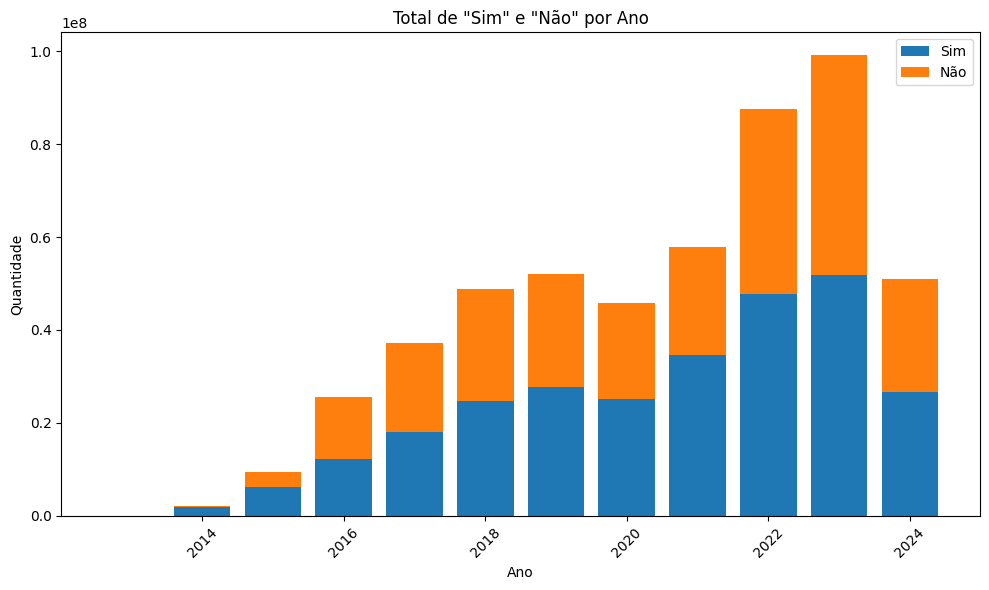

In [16]:
# Configurando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os valores de 'Sim' e 'Não' empilhados
ax.bar(result_ano['Ano'], result_ano['Sim'], label='Sim')
ax.bar(result_ano['Ano'], result_ano['Não'], bottom=result_ano['Sim'], label='Não')

# Customizações do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
ax.set_title('Acompanhamento de vascinação')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()